In [44]:
# Pence vs. Harris
# No. Data: 7,000 (3,500 each)
# Subjectivity: Pence (0.338) > Harris (0.290); People talk subjectively on Pence more than Harris'.
# Polarity: Pence (0.106) > Harris (0.045); People has better perspectives on Pence than Harris'.
# Popularity: Pence (64.90) > Harris (56.76); Pence has more popularity than Harris'.

In [1]:
import numpy as np
import pandas as pd
import tweepy
import matplotlib.pyplot as plt
import pymongo
import ipywidgets as wgt
from IPython.display import display
from sklearn.feature_extraction.text import CountVectorizer
import re
from datetime import datetime

%matplotlib inline

In [13]:
col = pymongo.MongoClient()["DSA201"]["Pence"]
col.count()

C:\Users\PornpatSamartlertdee\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere
  


3500

In [14]:
col.find_one()

{'_id': ObjectId('5f9fd80ca0425328bff73ca2'),
 'created_at': 'Mon Nov 02 09:57:29 +0000 2020',
 'id': 1323202563404156937,
 'id_str': '1323202563404156937',
 'text': 'RT @RedPBlueP: Local News Paper, Pittsburgh Post Gazette, endorses Trump for handling of economy; first GOP presidential endorsement since…',
 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>',
 'truncated': False,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 4781711607,
  'id_str': '4781711607',
  'name': '🔴RedPiLL vs BluePiLL🌀',
  'screen_name': 'RedPBlueP',
  'location': '#FreeAssange',
  'url': None,
  'description': "Neither Left Nor Right #AntiGlobalist #AntiWars, Every state should have the right to determine its own destiny without interfering with other states' destinies",
  'translator_type': 'none',
  'protected': False,
  'verified': False,
 

In [15]:
pence_dataset = [{"created_at": item["created_at"],
            "text": item["text"],
            "user": "@%s" % item["user"]["screen_name"],
            "source": item["source"],
            "lang":item["lang"],
            
           } for item in col.find()]

pence_dataset = pd.DataFrame(pence_dataset)
#from googletrans import Translator
#translator=Translator()
#pence_dataset.text=translator.translate(dataset.text)
pence_dataset

,created_at,text,user,source,lang
0,Mon Nov 02 09:57:29 +0000 2020,"RT @RedPBlueP: Local News Paper, Pittsburgh Po...",@RedPBlueP,"<a href=""https://mobile.twitter.com"" rel=""nofo...",en
1,Mon Nov 02 09:57:30 +0000 2020,@Magamaniatrump @bangordailynews maine has the...,@keithleaflets,"<a href=""https://mobile.twitter.com"" rel=""nofo...",en
2,Mon Nov 02 09:57:31 +0000 2020,"RT @xoxoSeokjinnie: Oh, lawd. First we have th...",@sunshine199966,"<a href=""http://twitter.com/download/iphone"" r...",en
3,Mon Nov 02 09:57:43 +0000 2020,@KatyTurNBC Trump's bogus impeachment trial ke...,@davidmcgetrick,"<a href=""http://twitter.com/download/android"" ...",en
4,Mon Nov 02 09:57:44 +0000 2020,RT @JulesProcopio: First time in nearly 40 YEA...,@GreenWahine,"<a href=""http://twitter.com/download/android"" ...",en
...,...,...,...,...,...
3495,Mon Nov 02 14:07:41 +0000 2020,@Mike_Pence @realDonaldTrump @PittsburghPG @bo...,@crabbyocarrie,"<a href=""http://twitter.com/download/android"" ...",tl
3496,Mon Nov 02 14:07:42 +0000 2020,RT @Liz_SalanderUS: @DulceTosta @DulceMariaTos...,@FranciscoM1816,"<a href=""https://mobile.twitter.com"" rel=""nofo...",en
3497,Mon Nov 02 14:07:43 +0000 2020,RT @prayingmedic: Joe Biden has a one way tick...,@ShirleyCatron,"<a href=""http://twitter.com/#!/download/ipad"" ...",en
3498,Mon Nov 02 14:07:43 +0000 2020,Nothing is impossible when you put your trust ...,@kid_777mo4G_d,"<a href=""https://mobile.twitter.com"" rel=""nofo...",en


In [16]:
cv = CountVectorizer()
count_matrix = cv.fit_transform(pence_dataset.text)

word_count = pd.DataFrame(cv.get_feature_names(), columns=["word"])
word_count["count"] = count_matrix.sum(axis=0).tolist()[0]
word_count = word_count.sort_values("count", ascending=False).reset_index(drop=True)
word_count[:50]

,word,count
0,the,2217
1,rt,1998
2,realdonaldtrump,1148
3,https,1135
4,co,1111
5,in,1104
6,trump,1042
7,pence,992
8,for,963
9,this,795


Tweetbot for iΟS              2
BexxPersonalBot               2
Puujee Puje                   3
dlvr.it                       8
Cheap Bots, Done Quick!       8
TweetDeck                    15
Twitter for iPad            192
Twitter Web App             925
Twitter for Android        1046
Twitter for iPhone         1266
Name: source, dtype: int64

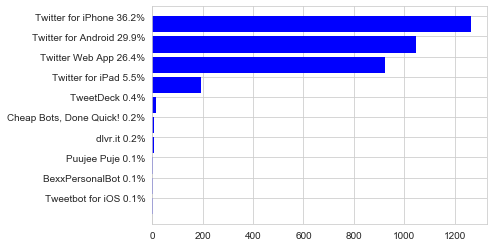

In [19]:
def get_source_name(x):
    value = re.findall(pattern="<[^>]+>([^<]+)</a>", string=x)
    if len(value) > 0:
        return value[0]
    else:
        return ""
pence_dataset.source_name = pence_dataset.source.apply(get_source_name)

source_counts = pence_dataset.source_name.value_counts().sort_values()[-10:]

bottom = [index for index, item in enumerate(source_counts.index)]
plt.barh(bottom, width=source_counts, color="blue", linewidth=0)

y_labels = ["%s %.1f%%" % (item, 100.0*source_counts[item]/len(pence_dataset)) for index,item in enumerate(source_counts.index)]
plt.yticks(np.array(bottom)+0.4, y_labels)

source_counts

pl        3
sv        4
tr        6
tl        8
de       14
pt       27
es       65
fr      120
und     260
en     2973
Name: lang, dtype: int64

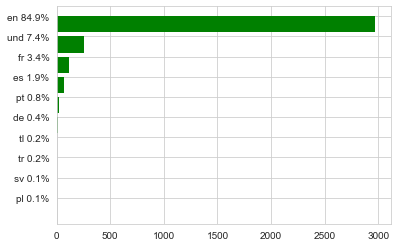

In [20]:
lang_counts = pence_dataset.lang.value_counts().sort_values()[-10:]
bottom = [index for index, item in enumerate(lang_counts.index)]
plt.barh(bottom, width=lang_counts, color="green", linewidth=0)
y_labels = ["%s %.1f%%" % (item, 100.0*lang_counts[item]/len(pence_dataset)) for index,item in enumerate(lang_counts.index)]
plt.yticks(np.array(bottom)+0.4, y_labels)
lang_counts

In [21]:
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
from  textblob import TextBlob

In [24]:
pence_dataset1 = [{"id": item["id"],
            "text": item["text"],
            "lang":item["lang"],
            
           } for item in col.find()]

pence_dataset1 = pd.DataFrame(pence_dataset1)

is_pence_dataset1=pence_dataset1.lang=="en"
pence_dataset1=pence_dataset1[is_pence_dataset1]
pence_dataset1

,id,text,lang
0,1323202563404156937,"RT @RedPBlueP: Local News Paper, Pittsburgh Po...",en
1,1323202567762006018,@Magamaniatrump @bangordailynews maine has the...,en
2,1323202572224745473,"RT @xoxoSeokjinnie: Oh, lawd. First we have th...",en
3,1323202619528065025,@KatyTurNBC Trump's bogus impeachment trial ke...,en
4,1323202625127395330,RT @JulesProcopio: First time in nearly 40 YEA...,en
...,...,...,...
3494,1323265528065130500,@Mike_Pence @realDonaldTrump @PittsburghPG @bo...,en
3496,1323265529734483969,RT @Liz_SalanderUS: @DulceTosta @DulceMariaTos...,en
3497,1323265535317057536,RT @prayingmedic: Joe Biden has a one way tick...,en
3498,1323265536675950592,Nothing is impossible when you put your trust ...,en


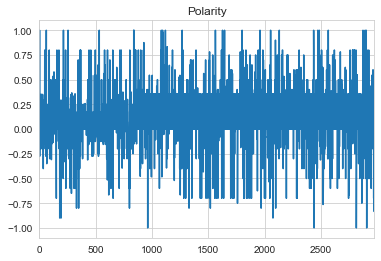

In [25]:
tweettext=pence_dataset1['text']
wordlist=pd.DataFrame();

polarity=[]
subj=[]

for t in tweettext:
    tx= TextBlob(t)
    polarity.append(tx.sentiment.polarity)
    subj.append(tx.sentiment.subjectivity)

poltweet= pd.DataFrame({'polarity':polarity,'subjectivity':subj})
poltweet.polarity.plot(title='Polarity')
plt.show()

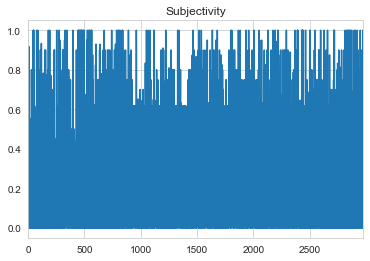

In [26]:
poltweet.subjectivity.plot(title='Subjectivity')
plt.show()

In [27]:
import statistics
statistics.mean(poltweet.polarity)

0.10628406450160224

In [28]:
import statistics
statistics.mean(poltweet.subjectivity)

0.338656340775022

In [29]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS

def wc(data,bgcolor,title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

In [30]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import re
top_N = 100
#convert list of list into text
#a=''.join(str(r) for v in df_usa['title'] for r in v)

a = pence_dataset1['text'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
b = re.sub('[^A-Za-z]+', ' ', a)
nltk.download('stopwords')
#remove all the stopwords from the text
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)
word_tokens = word_tokenize(b)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PornpatSamartlertdee\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package stopwords is already up-to-date!


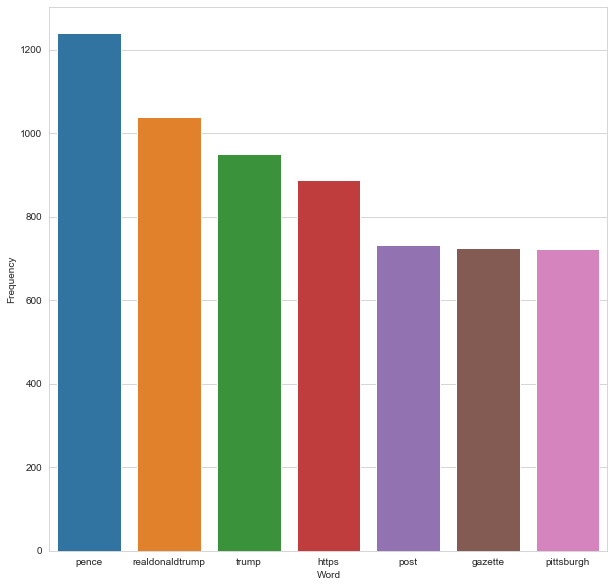

In [31]:
import seaborn as sns
# Remove characters which have length less than 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]        

# Calculate frequency distribution
word_dist = nltk.FreqDist(cleaned_data_title)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(7))

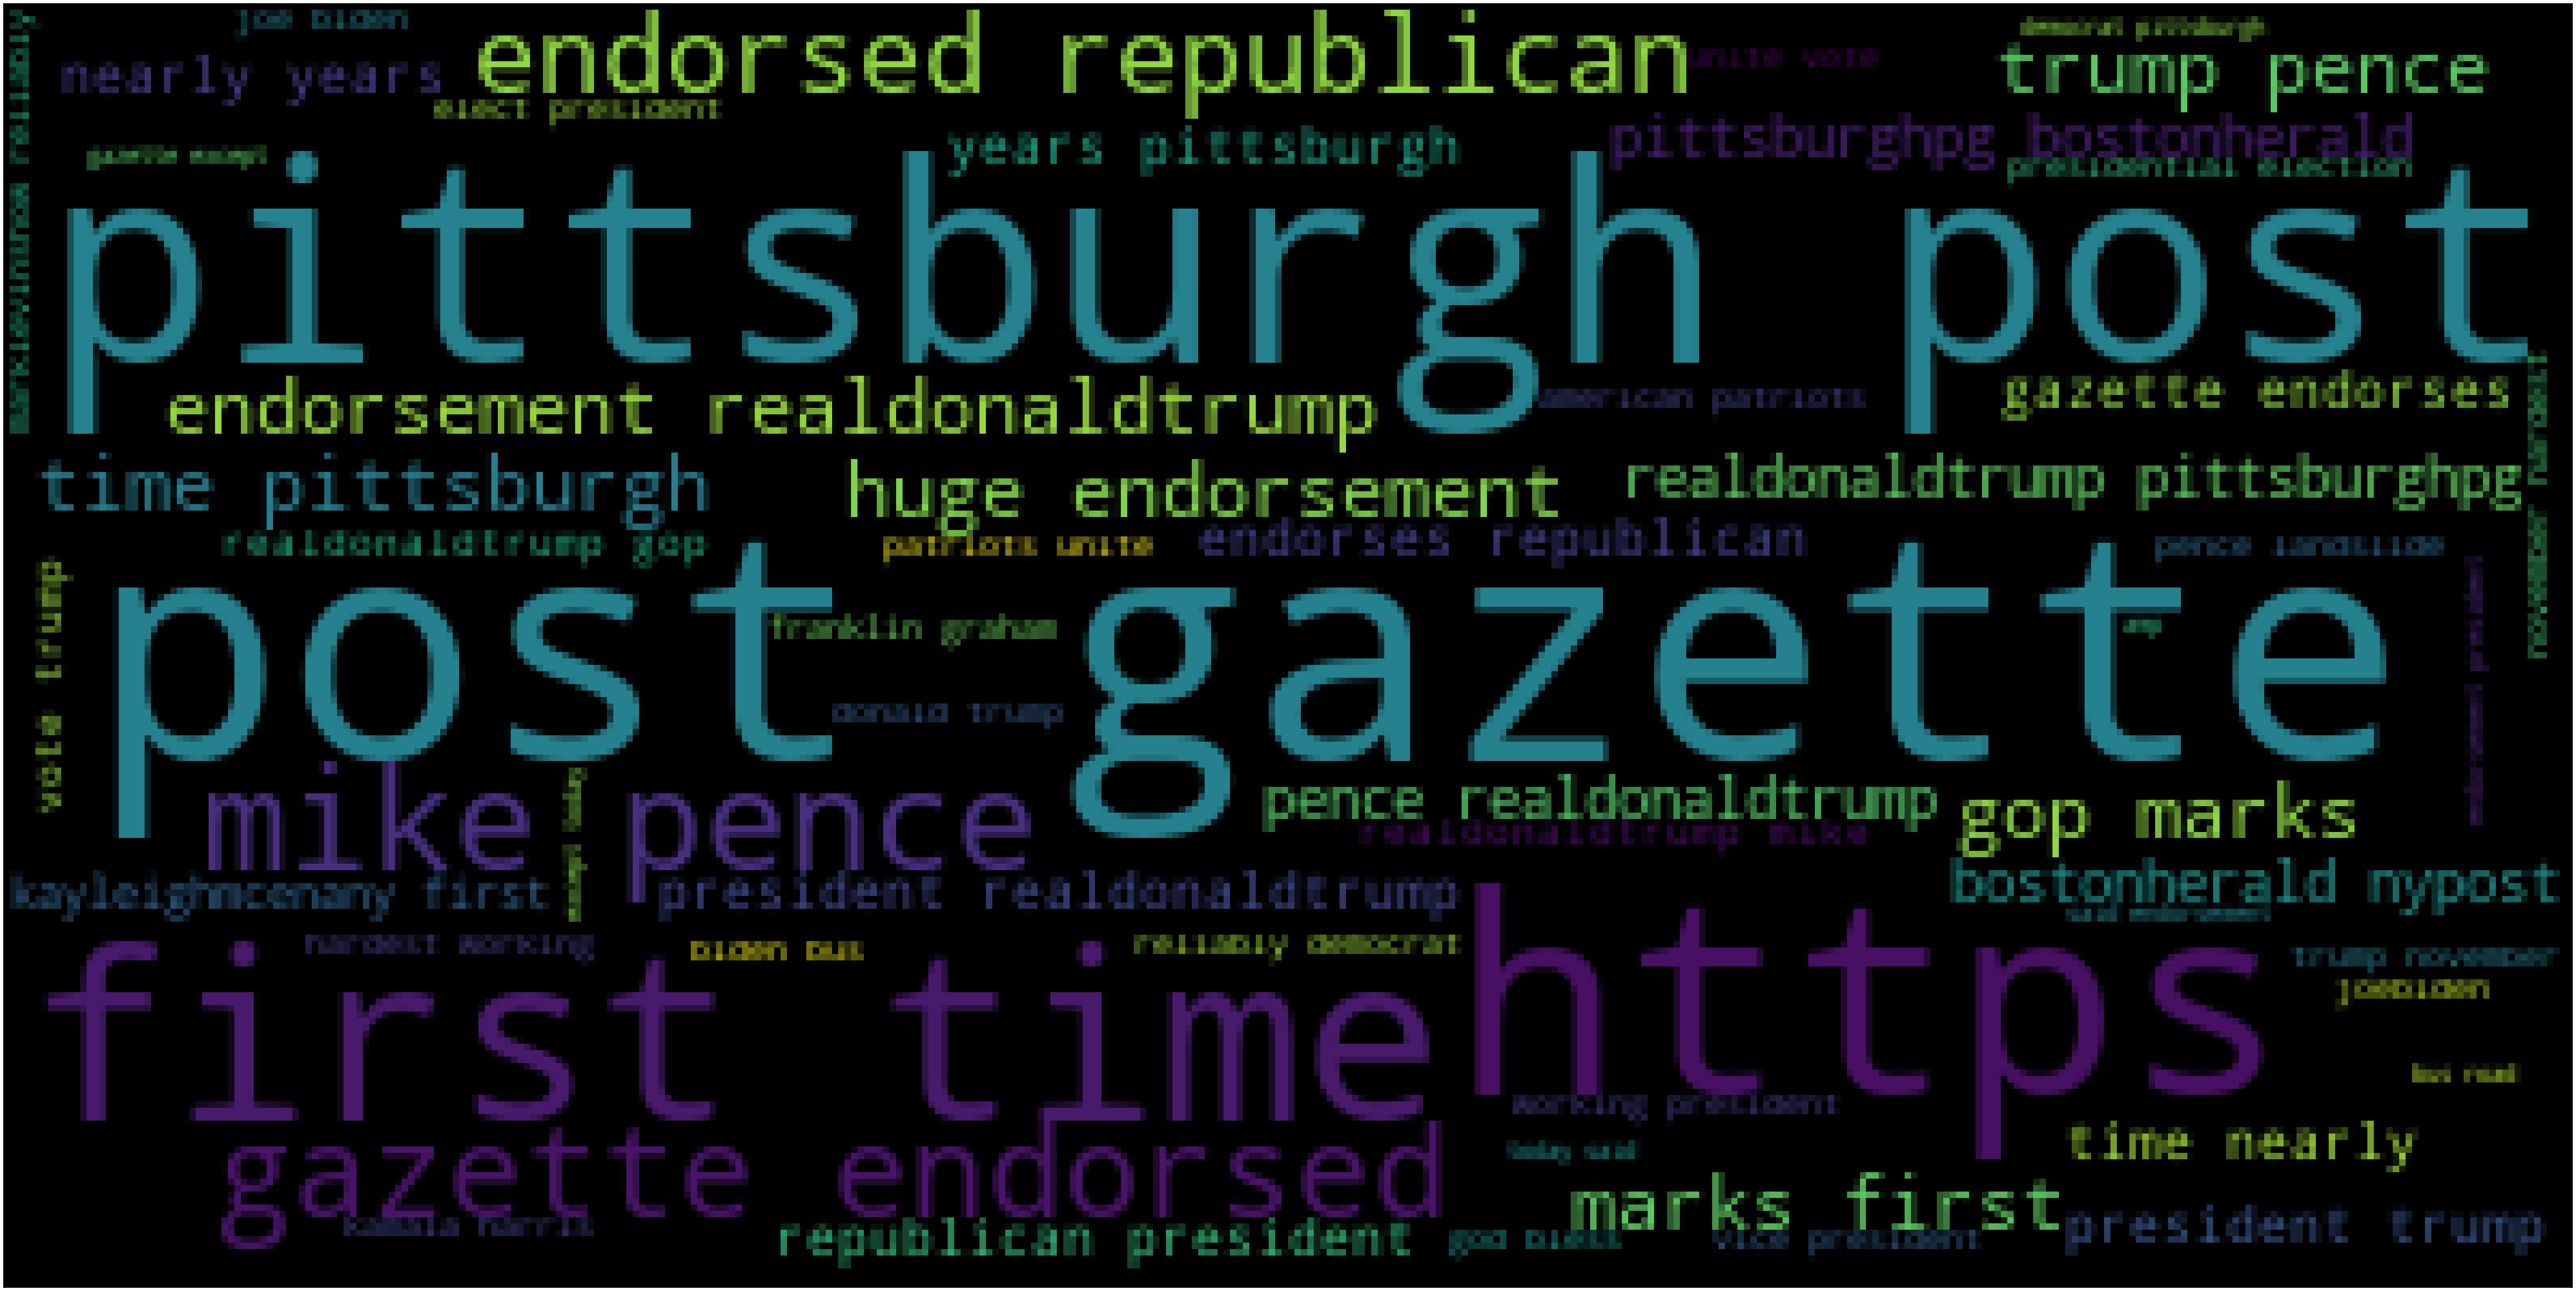

In [32]:
wc(cleaned_data_title,'black','Common Words' )

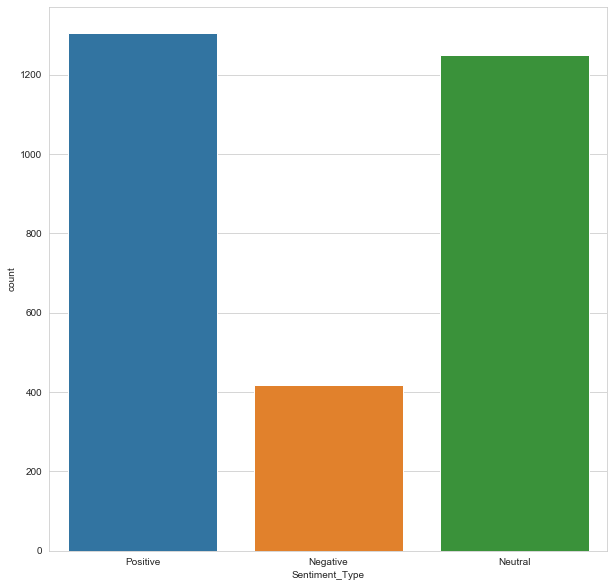

In [33]:
from textblob import TextBlob

bloblist_desc = list()

twit=pence_dataset1['text'].astype(str)
for row in twit:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    twit_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])
    
def f(twit_polarity_desc):
    if twit_polarity_desc['sentiment'] > 0:
        val = "Positive"
    elif twit_polarity_desc['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

twit_polarity_desc['Sentiment_Type'] = twit_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=twit_polarity_desc)

In [34]:
import collections, numpy as np
a=twit_polarity_desc.Sentiment_Type
neut=np.count_nonzero(a == 'Neutral')
pos=np.count_nonzero(a == 'Positive')
neg=np.count_nonzero(a == 'Negative')
popularity='{0:.2f}'.format((((neut*0.5)+(pos)+(neg*0))/(neut+pos+neg))*100)
popularity

'64.90'

In [35]:
#Harris

In [36]:
col = pymongo.MongoClient()["DSA201"]["Harris"]
col.count()

C:\Users\PornpatSamartlertdee\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere
  


3500

In [37]:
col.find_one()

{'_id': ObjectId('5f9fe042f5ac5b22247a42f4'),
 'created_at': 'Mon Nov 02 10:32:29 +0000 2020',
 'id': 1323211371669037057,
 'id_str': '1323211371669037057',
 'text': 'RT @tommcintyre1947: https://t.co/Q4PsEUc5TI\n "Yes, It\'s Time to Talk About President Kamala Harris"   @JoeBiden\'s election would serve pri…',
 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>',
 'truncated': False,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 3353403803,
  'id_str': '3353403803',
  'name': '🇺🇸 Cajun Sunshine ☀',
  'screen_name': 'somer_stoutes',
  'location': 'Louisiana, USA',
  'url': 'Http://www.etsy.com/shop/NaturesIndulgenceUS',
  'description': '37 year old business owner, gamer nerd, paranormal hunter, and Witch. Proud American/Cajun #LouisianaStrong #WWG1WGA #TheGreatAwakening #ITookTheOath #Patriot',
  'translator_type': 'non

In [38]:
harris_dataset = [{"created_at": item["created_at"],
            "text": item["text"],
            "user": "@%s" % item["user"]["screen_name"],
            "source": item["source"],
            "lang":item["lang"],
            
           } for item in col.find()]

harris_dataset = pd.DataFrame(harris_dataset)
#from googletrans import Translator
#translator=Translator()
#biden_dataset.text=translator.translate(dataset.text)
harris_dataset

,created_at,text,user,source,lang
0,Mon Nov 02 10:32:29 +0000 2020,RT @tommcintyre1947: https://t.co/Q4PsEUc5TI\n...,@somer_stoutes,"<a href=""https://mobile.twitter.com"" rel=""nofo...",en
1,Mon Nov 02 10:32:31 +0000 2020,RT @zeusFanHouse: THE MASK IS OFF:Kamala Harri...,@kmbashkan,,en
2,Mon Nov 02 10:32:31 +0000 2020,RT @l78lancer: As the true party of minority t...,@DebraEdgell5,"<a href=""http://twitter.com/download/iphone"" r...",en
3,Mon Nov 02 10:32:31 +0000 2020,RT @charliekirk11: This is the line to get in ...,@rlgsnsd,"<a href=""http://ubersocial.com"" rel=""nofollow""...",en
4,Mon Nov 02 10:32:32 +0000 2020,RT @MAJMO50: Laura Loomer outs FAKE Kamala Har...,@Kathryn83420497,"<a href=""http://twitter.com/download/iphone"" r...",en
...,...,...,...,...,...
3495,Mon Nov 02 10:58:37 +0000 2020,FAKE KAMALA GOT LOOMERED! --Laura Loomer Catch...,@washcoauditor,"<a href=""http://twitter.com/download/iphone"" r...",en
3496,Mon Nov 02 10:58:38 +0000 2020,Democrats for Trump,@TCM4950,"<a href=""https://mobile.twitter.com"" rel=""nofo...",en
3497,Mon Nov 02 10:58:38 +0000 2020,"Harris Promotes ‘Equity’ In New Video, Gets Ri...",@Steve_yerp,"<a href=""http://twitter.com/download/iphone"" r...",en
3498,Mon Nov 02 10:58:39 +0000 2020,This is delusional! Kamala is the the Clear &a...,@DFBHarvard,"<a href=""http://twitter.com/download/android"" ...",en


In [39]:
cv = CountVectorizer()
count_matrix = cv.fit_transform(harris_dataset.text)

word_count = pd.DataFrame(cv.get_feature_names(), columns=["word"])
word_count["count"] = count_matrix.sum(axis=0).tolist()[0]
word_count = word_count.sort_values("count", ascending=False).reset_index(drop=True)
word_count[:50]

,word,count
0,rt,2426
1,the,2061
2,harris,1859
3,https,1159
4,to,1141
5,co,1122
6,biden,1079
7,kamala,956
8,is,856
9,and,844


Retweetteuse              3
IFTTT                     4
Tweetbot for iΟS          4
                          8
dlvr.it                   9
WordPress.com            19
Twitter for iPad        221
Twitter Web App         896
Twitter for Android    1051
Twitter for iPhone     1247
Name: source, dtype: int64

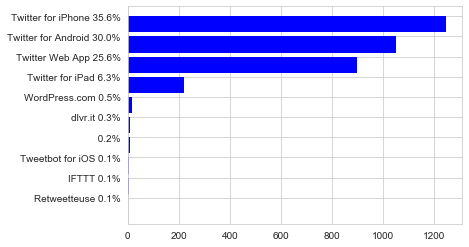

In [41]:
def get_source_name(x):
    value = re.findall(pattern="<[^>]+>([^<]+)</a>", string=x)
    if len(value) > 0:
        return value[0]
    else:
        return ""
harris_dataset.source_name = harris_dataset.source.apply(get_source_name)

source_counts = harris_dataset.source_name.value_counts().sort_values()[-10:]

bottom = [index for index, item in enumerate(source_counts.index)]
plt.barh(bottom, width=source_counts, color="blue", linewidth=0)

y_labels = ["%s %.1f%%" % (item, 100.0*source_counts[item]/len(harris_dataset)) for index,item in enumerate(source_counts.index)]
plt.yticks(np.array(bottom)+0.4, y_labels)

source_counts

tl        9
pt       10
eu       12
in       13
ja       17
de       37
es       61
fr      119
und     125
en     3055
Name: lang, dtype: int64

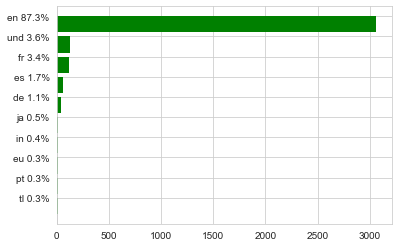

In [42]:
lang_counts = harris_dataset.lang.value_counts().sort_values()[-10:]
bottom = [index for index, item in enumerate(lang_counts.index)]
plt.barh(bottom, width=lang_counts, color="green", linewidth=0)
y_labels = ["%s %.1f%%" % (item, 100.0*lang_counts[item]/len(harris_dataset)) for index,item in enumerate(lang_counts.index)]
plt.yticks(np.array(bottom)+0.4, y_labels)
lang_counts

In [43]:
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
from  textblob import TextBlob

In [44]:
harris_dataset1 = [{"id": item["id"],
            "text": item["text"],
            "lang":item["lang"],
            
           } for item in col.find()]

harris_dataset1 = pd.DataFrame(harris_dataset1)

is_harris_dataset1=harris_dataset1.lang=="en"
harris_dataset1=harris_dataset1[is_harris_dataset1]
harris_dataset1

,id,text,lang
0,1323211371669037057,RT @tommcintyre1947: https://t.co/Q4PsEUc5TI\n...,en
1,1323211377234878464,RT @zeusFanHouse: THE MASK IS OFF:Kamala Harri...,en
2,1323211378811961344,RT @l78lancer: As the true party of minority t...,en
3,1323211379814268928,RT @charliekirk11: This is the line to get in ...,en
4,1323211382796345345,RT @MAJMO50: Laura Loomer outs FAKE Kamala Har...,en
...,...,...,...
3495,1323217948190932993,FAKE KAMALA GOT LOOMERED! --Laura Loomer Catch...,en
3496,1323217951714168832,Democrats for Trump,en
3497,1323217952435560448,"Harris Promotes ‘Equity’ In New Video, Gets Ri...",en
3498,1323217954775932930,This is delusional! Kamala is the the Clear &a...,en


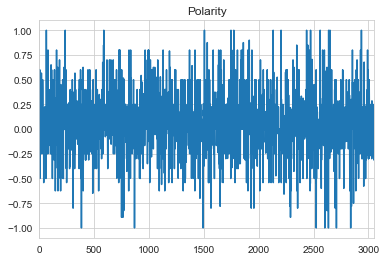

In [45]:
tweettext=harris_dataset1['text']
wordlist=pd.DataFrame();

polarity=[]
subj=[]

for t in tweettext:
    tx= TextBlob(t)
    polarity.append(tx.sentiment.polarity)
    subj.append(tx.sentiment.subjectivity)

poltweet= pd.DataFrame({'polarity':polarity,'subjectivity':subj})
poltweet.polarity.plot(title='Polarity')
plt.show()

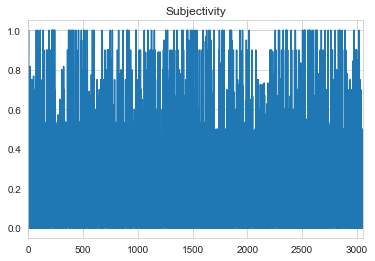

In [46]:
poltweet.subjectivity.plot(title='Subjectivity')
plt.show()

In [47]:
import statistics
statistics.mean(poltweet.polarity)

0.04543112279996434

In [48]:
import statistics
statistics.mean(poltweet.subjectivity)

0.2927201638453684

In [49]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS

def wc(data,bgcolor,title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

In [50]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import re
top_N = 100
#convert list of list into text
#a=''.join(str(r) for v in df_usa['title'] for r in v)

a = harris_dataset1['text'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
b = re.sub('[^A-Za-z]+', ' ', a)
nltk.download('stopwords')
#remove all the stopwords from the text
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)
word_tokens = word_tokenize(b)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PornpatSamartlertdee\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package stopwords is already up-to-date!


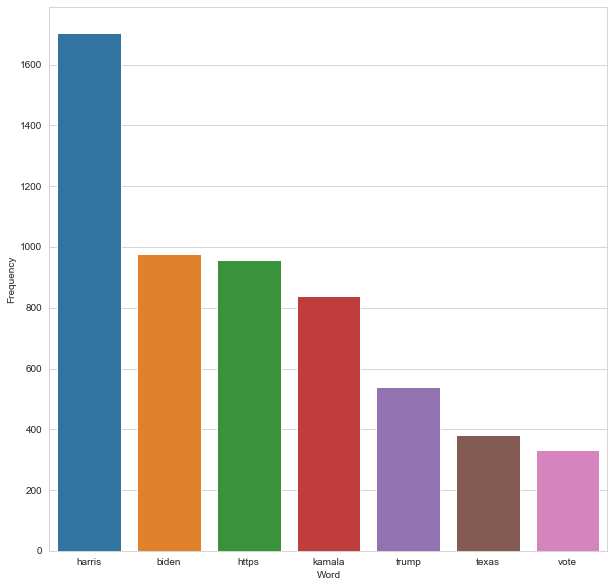

In [51]:
import seaborn as sns
# Remove characters which have length less than 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]        

# Calculate frequency distribution
word_dist = nltk.FreqDist(cleaned_data_title)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(7))

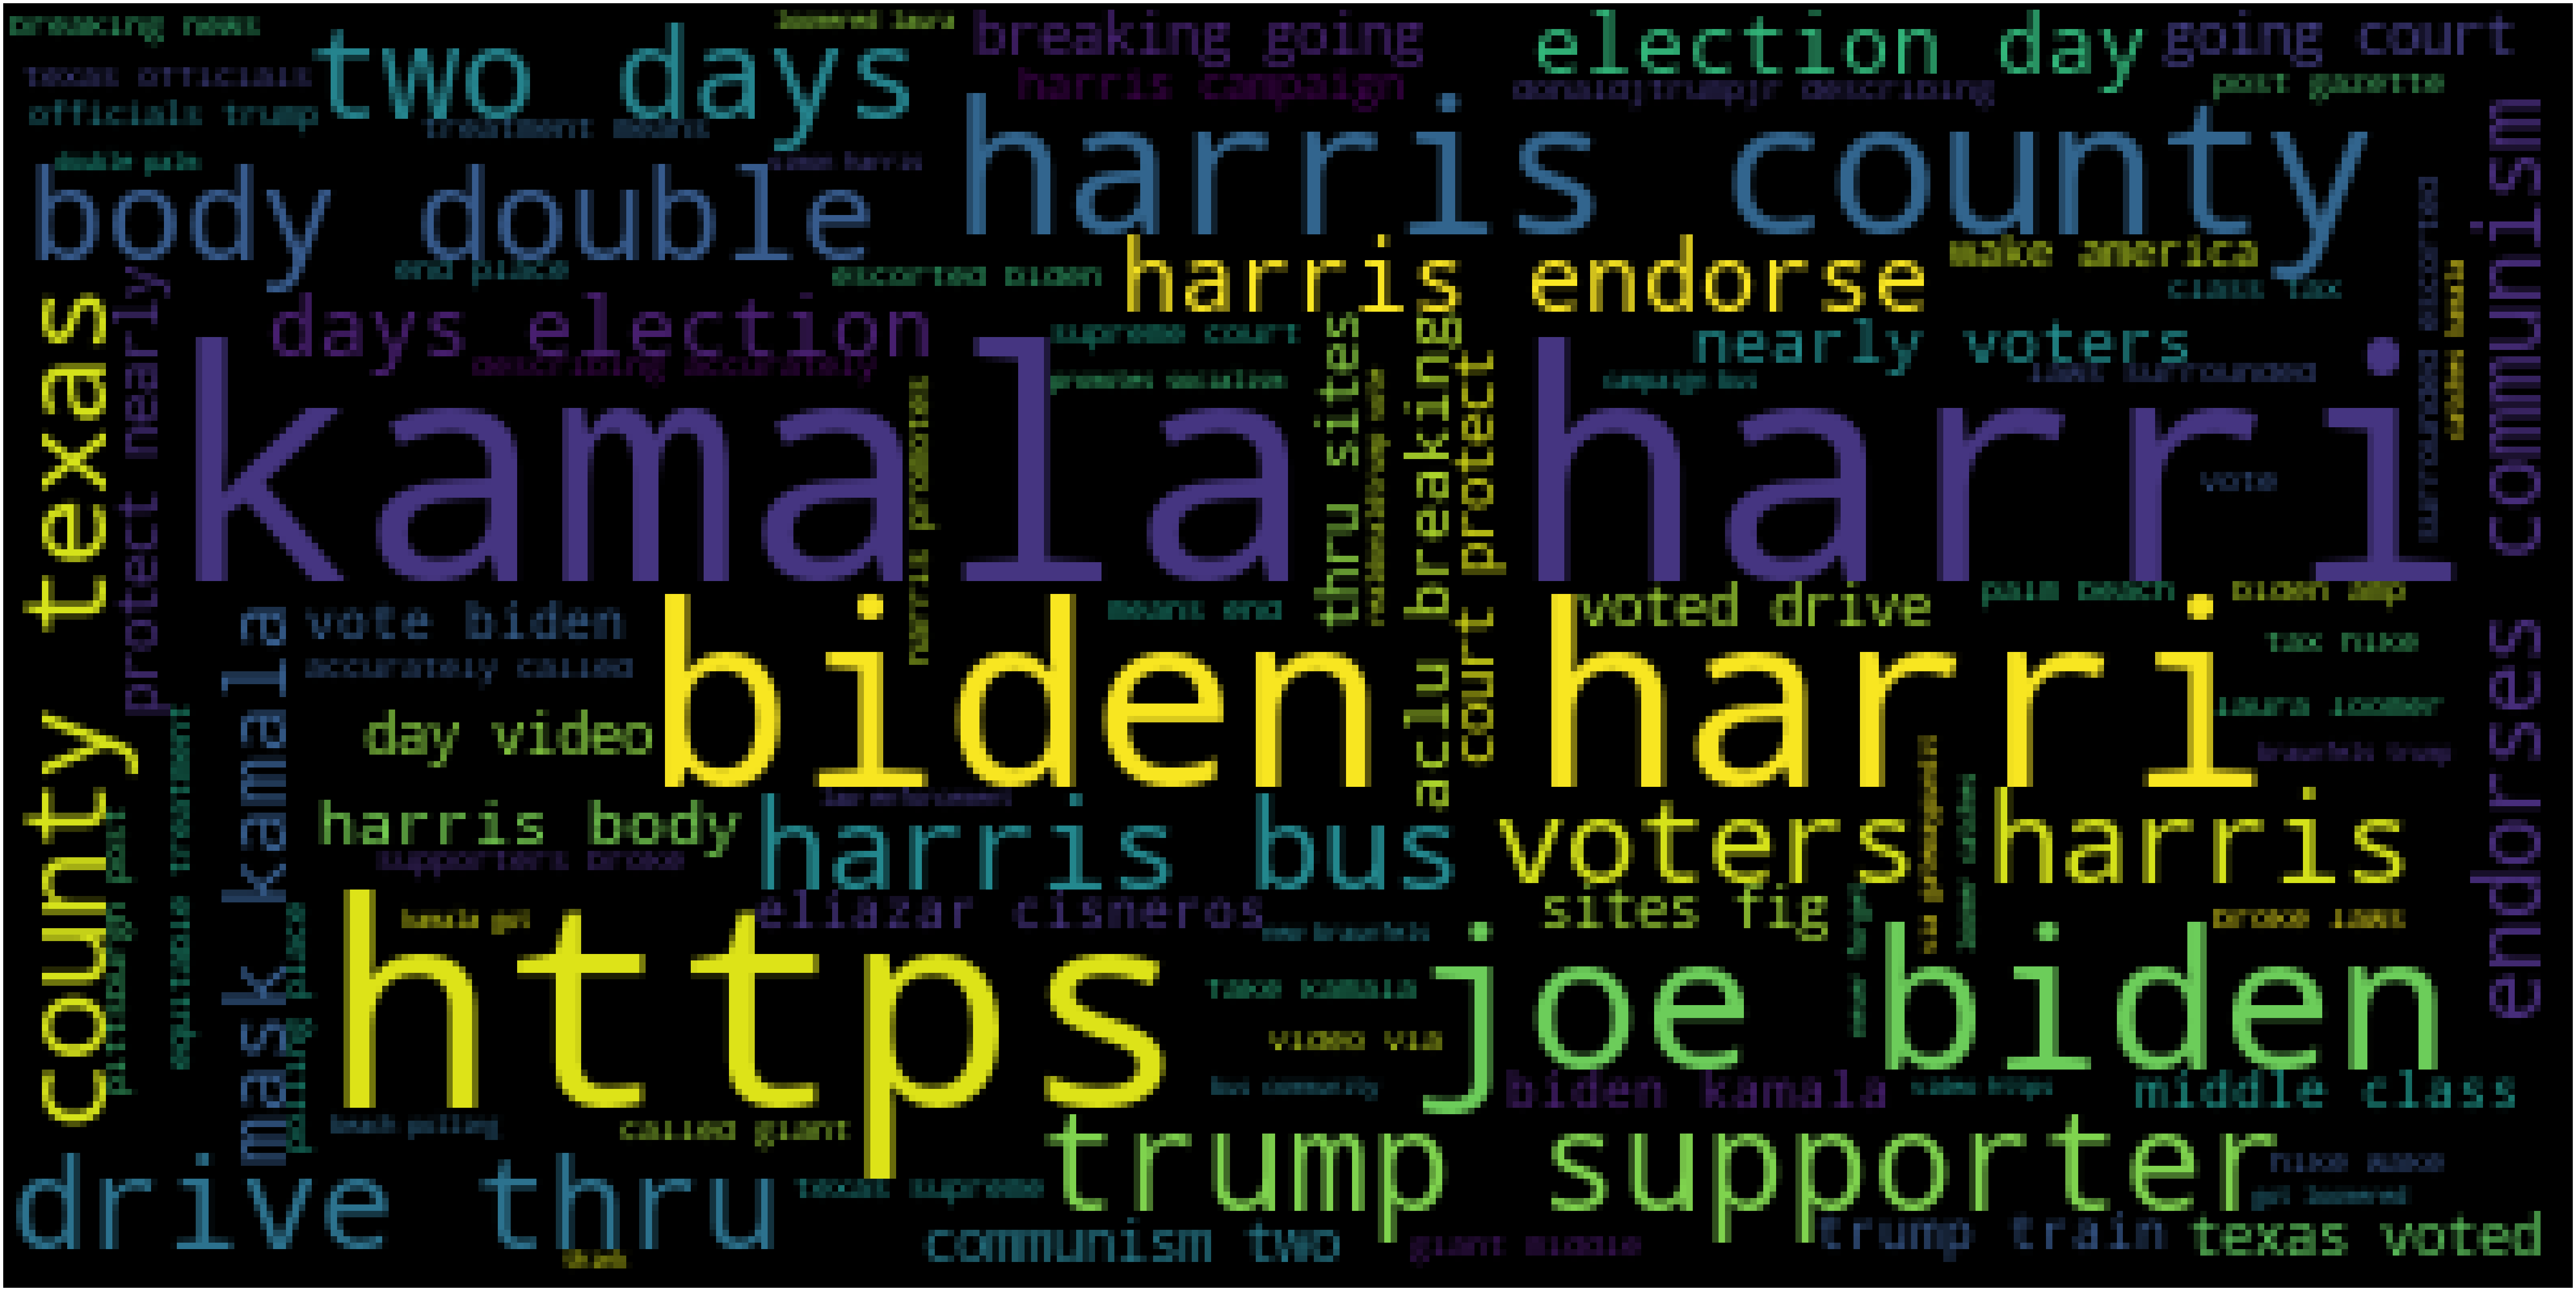

In [52]:
wc(cleaned_data_title,'black','Common Words' )

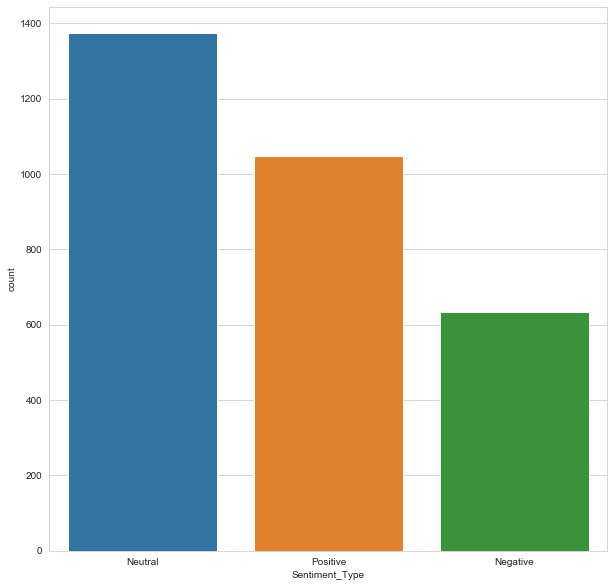

In [53]:
from textblob import TextBlob

bloblist_desc = list()

twit=harris_dataset1['text'].astype(str)
for row in twit:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    twit_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])
    
def f(twit_polarity_desc):
    if twit_polarity_desc['sentiment'] > 0:
        val = "Positive"
    elif twit_polarity_desc['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

twit_polarity_desc['Sentiment_Type'] = twit_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=twit_polarity_desc)

In [54]:
import collections, numpy as np
a=twit_polarity_desc.Sentiment_Type
neut=np.count_nonzero(a == 'Neutral')
pos=np.count_nonzero(a == 'Positive')
neg=np.count_nonzero(a == 'Negative')
popularity='{0:.2f}'.format((((neut*0.5)+(pos)+(neg*0))/(neut+pos+neg))*100)
popularity

'56.76'